# Runge Kutta Methods

Strogatz

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Euler method

$$ y_{n+1} = y_n + h f(x_n, y_n) $$

For example:
$y' = 1 + y^2 $ and $y(0) = 0$. 
find $y(0.5)$

In [4]:
h = 0.1
def f(y):
	return 1 + y*y

x, y = 0, 0
for _ in range(5):
	y = y + h * f(y)
	x += h

x, y

(0.5, 0.5315132279968876)

Using improved Euler's method

$$ y_{n+1} = y_n + h \frac{f(x_n, y_n) + f(x_{n+1}, y^*_{y+1})}{2} $$
$$ y^*_{n+1} = y_n + h f(x_{n+1}, y_{y+1}) $$

For example:
$y' = 2x - 3y + 1 $ and $y(1) = 5$. 
find $y(1.5)$

In [5]:
h = 0.1
def f(x,y):
	return 2*x - 3*y + 1

x, y = 1, 5
for _ in range(5):
	x_n, y_n = x, y
	yp = y_n + h * f(x_n, y_n) 

	x += h
	y = y_n + h * (f(x_n, y_n) + f(x, yp))/2

x, y

(1.5000000000000004, 2.08010815224375)

# Runge-Kutta

$$ y_{n+1} = y_n + h (w_1 k_1 + w_2 k_2 + w_3 k_3 + w_4 k_4) $$
$$ k_1 = f(x_n, y_n) $$
$$ k_2 = f(x_n + \alpha_1 h, y_n + \beta_1 h k_1) $$
$$ k_3 = f(x_n + \alpha_2 h, y_n + \beta_2 h k_1 + \beta_3 h k_2) $$
$$ k_4 = f(x_n + \alpha_3 h, y_n + \beta_4 h k_1 + \beta_5 h k_2 + \beta_6 h k_3) $$

This is the generic version and agrees with Taylor polynomial of degree four.

The most common form is the following. In fact, it is so common, people often refer to this as the Runge-Kutta method:

$$ y_{n+1} = y_n + \frac{h}{6} (k_1 + 2 k_2 + 2k_3 + k_4) $$
$$ k_1 = f(x_n, y_n) $$
$$ k_2 = f(x_n + \frac{1}{2} h, y_n + \frac{1}{2} h k_1) $$
$$ k_3 = f(x_n + \frac{1}{2} h, y_n + \frac{1}{2} h k_2) $$
$$ k_4 = f(x_n + h, y_n + h k_3) $$

For example, $h=0.1$, find $~y(1.5)$ given $y' = 2xy$, $y(1)=1$

In [9]:
h = 0.1

def f(x, y):
	return 2*x*y

x, y = 1, 1
for _ in range(5):
	k_1 = f(x, y)
	k_2 = f(x + 0.5 * h, y + 0.5 * h * k_1)
	k_3 = f(x + 0.5 * h, y + 0.5 * h * k_2)
	k_4 = f(x + h, y + h * k_3)

	y = y + (h/6) * (k_1 + 2*k_2 + 2*k_3 + k_4)
	x += h

x, y

(1.5000000000000004, 3.49021063637295)

Why this not working? Not runge-kutta

$$ \frac{dx}{dt} = x(1-x) $$

/var/folders/vg/5vdppb7s63x_nslhxytqlt7r0000gn/T/ipykernel_8348/3120626140.py:10: RuntimeWarning: overflow encountered in scalar multiply
  deriv = x * (1 - x)


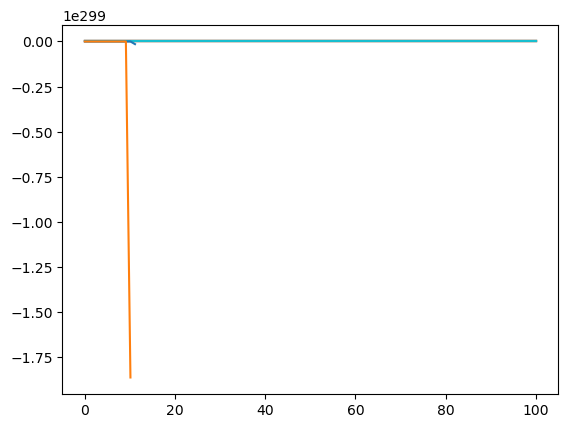

In [12]:
# dx/dt = x(1-x)

starting_pos = np.linspace(0, 2.4, 12)
for init in starting_pos:

	values = np.array([])
	times = np.linspace(0, 100, 100)
	x = init
	for t in times:
		deriv = x * (1 - x)
		x += deriv
		values = np.append(values, x)
	plt.plot(times, values)
plt.show()


Trying again:

$$ \frac{dx}{dt} = x(1-x) $$

And varying the initial conditions

In [10]:
####ONLY CHANGES HERE######
h = 0.1
x, y = 0, 1
def f(x, y):
	return x * (1 - x)
####NO CHANGES BELOW######

for _ in range(10):
	k_1 = f(x, y)
	k_2 = f(x + 0.5 * h, y + 0.5 * h * k_1)
	k_3 = f(x + 0.5 * h, y + 0.5 * h * k_2)
	k_4 = f(x + h, y + h * k_3)

	y = y + (h/6) * (k_1 + 2*k_2 + 2*k_3 + k_4)
	x += h
x, y

(0.9999999999999999, 1.166666666666666)

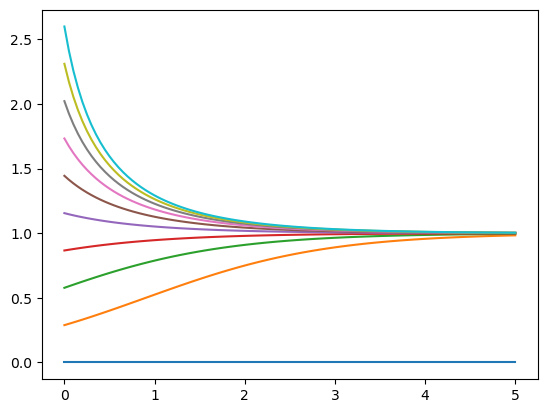

In [38]:
####ONLY CHANGES HERE######
h = 0.05
N = 10 # num of lines
x, y = np.zeros(N), np.linspace(0, 2.6, N)
def f(x, y):
	return y * (1 - y)
####NO CHANGES BELOW######

plot_x = np.array([x])
plot_y = np.array([y])

time_len = 100
for _ in range(time_len):
	k_1 = f(x, y)
	k_2 = f(x + 0.5 * h, y + 0.5 * h * k_1)
	k_3 = f(x + 0.5 * h, y + 0.5 * h * k_2)
	k_4 = f(x + h, y + h * k_3)

	y = y + (h/6) * (k_1 + 2*k_2 + 2*k_3 + k_4)
	x += h

	plot_x = np.vstack((plot_x, x))
	plot_y = np.vstack((plot_y, y))

for i in range(N):
	plt.plot(plot_x[:, i], plot_y[:, i])
plt.show()

$$ \frac{dr}{dt} = r(1 - r^2), \frac{d\theta}{dt} = 1 $$

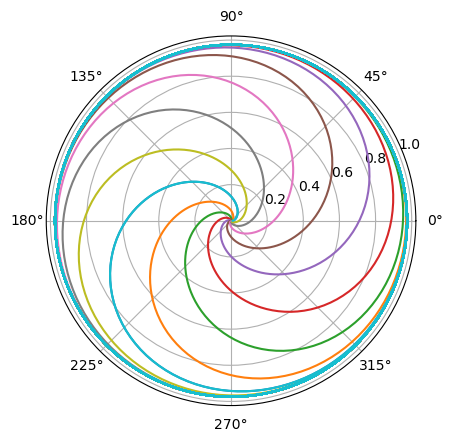

In [45]:
####ONLY CHANGES HERE######
h = 0.05
N = 10 # num of lines
r, t = np.ones(N)/100, np.linspace(0, 2*np.pi, N)
def f(r, t):
	return r * (1 - r*r)
####NO CHANGES BELOW######

plot_r = np.array([r])
plot_t = np.array([t])

time_len = 10000
for _ in range(time_len):
	k_1 = f(r, t)
	k_2 = f(r + 0.5 * h, t + 0.5 * h * k_1)
	k_3 = f(r + 0.5 * h, t + 0.5 * h * k_2)
	k_4 = f(r + h, t + h * k_3)

	r = r + (h/6) * (k_1 + 2*k_2 + 2*k_3 + k_4)
	t += h

	plot_r = np.vstack((plot_r, r))
	plot_t = np.vstack((plot_t, t))


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
for i in range(N):
	ax.plot(plot_t[:, i], plot_r[:, i])
plt.show()


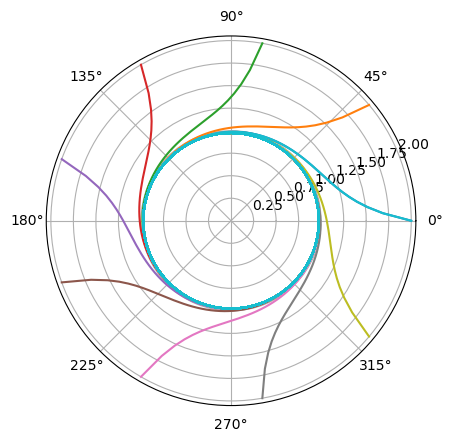

In [46]:

####ONLY CHANGES HERE######
h = 0.05
N = 10 # num of lines
r, t = np.ones(N)*2, np.linspace(0, 2*np.pi, N)
def f(r, t):
	return r * (1 - r*r)
####NO CHANGES BELOW######

plot_r = np.array([r])
plot_t = np.array([t])

time_len = 10000
for _ in range(time_len):
	k_1 = f(r, t)
	k_2 = f(r + 0.5 * h, t + 0.5 * h * k_1)
	k_3 = f(r + 0.5 * h, t + 0.5 * h * k_2)
	k_4 = f(r + h, t + h * k_3)

	r = r + (h/6) * (k_1 + 2*k_2 + 2*k_3 + k_4)
	t += h

	plot_r = np.vstack((plot_r, r))
	plot_t = np.vstack((plot_t, t))


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
for i in range(N):
	ax.plot(plot_t[:, i], plot_r[:, i])
plt.show()

# Van der Pol Oscillator

$$ y' = \mu (1-x^2) y - x $$
$$ y = x'$$

in respect to time

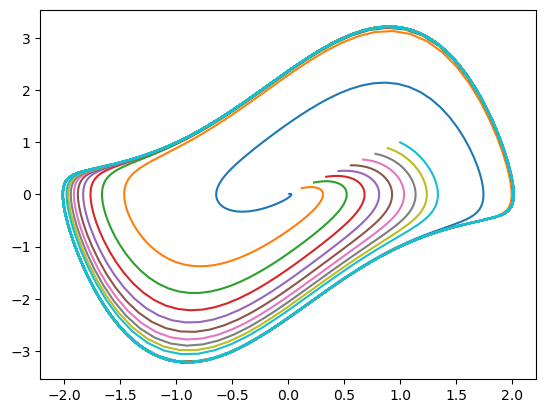

In [8]:
####ONLY CHANGES HERE######
h = 0.05
N = 10 # num of lines
mu = 1.5
x, y = np.linspace(0.01, 1, N), np.linspace(0.01, 1, N)
t = np.zeros(N)
def f_y(x, y):
	return mu * (1 - x*x) * y - x

def f_x(x, y):
	return y
####NO CHANGES BELOW######

plot_t = np.array([t]) # time
plot_x = np.array([x])
plot_y = np.array([y])

time_len = 1000
for _ in range(time_len):
	k_1x = f_x(x, y)
	k_1y = f_y(x, y)

	k_2y = f_y(x + 0.5 * h * k_1x, y + 0.5 * h * k_1y)
	k_2x = f_x(x + 0.5 * h * k_1x, y + 0.5 * h * k_1y)

	k_3y = f_y(x + 0.5 * h * k_2x, y + 0.5 * h * k_2y)
	k_3x = f_x(x + 0.5 * h * k_2x, y + 0.5 * h * k_2y)

	k_4y = f_y(x + h * k_3x, y + h * k_3y)
	k_4x = f_x(x + h * k_3x, y + h * k_3y)

	y = y + (h/6) * (k_1y + 2*k_2y + 2*k_3y + k_4y)
	x = x + (h/6) * (k_1x + 2*k_2x + 2*k_3x + k_4x)

	plot_x = np.vstack((plot_x, x))
	plot_y = np.vstack((plot_y, y))
	plot_t = np.vstack((plot_t, t))

for i in range(N):
	plt.plot(plot_x[:, i], plot_y[:, i])
plt.show()